In [88]:
import sklearn
from sklearn import tree
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import  display

In [4]:
from IPython.display import  HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

In [5]:
data = pd.read_csv('titanic.csv',  encoding='utf-8')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
X = data.drop(['PassengerId', 'Survived', 'Name', 'Ticket' , 'Cabin', 'Embarked', 'SibSp'], axis = 1)
Y = data.Survived
# axis = 1 значает, что удалятся столбцы, а не индексы датафрейма 
                      # Survived убрали, потому что будем ее предсказывать. ( Удаляем ненужные для предикшена столбцы)

In [15]:
X = pd.get_dummies (X) # конвертирует переменные (строчные) в числовые (0,1) автоматически

In [16]:
X = X.fillna({'Age' : X.Age.median( )}) # заменяет все пропущенные значения в возрасте на средний возраст пассажиров(медианный)

In [17]:
X['Age'].isnull().sum()

0

In [18]:
X.head( )

,Pclass,Age,Parch,Fare,Sex_female,Sex_male
0,3,22.0,0,7.2500,0,1
1,1,38.0,0,71.2833,1,0
2,3,26.0,0,7.9250,1,0
3,1,35.0,0,53.1000,1,0
4,3,35.0,0,8.0500,0,1


In [19]:
pd.options.mode.chained_assignment = None # отключаем розовые предупреждения)

In [20]:
# Разделяем нашу выборку на обучающую и тестовую
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [21]:
clf = tree.DecisionTreeClassifier(max_depth =5, random_state = 21)

In [22]:
clf.fit(X_train, Y_train) # обучаем модель

DecisionTreeClassifier(max_depth=5, random_state=21)

In [23]:
clf.score(X_test,Y_test) # проверяем точность

0.8169491525423729

In [24]:
clf.score(X, Y) # число правильных ответов (в 84 процентах случаев)

0.8395061728395061

In [30]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [34]:
# для построения леса деревьев решений и обучения моделей.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# для работы с графикой.
import matplotlib.pyplot as plt

In [35]:
# Задаем параметры модели.
parametrs = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10]}

In [38]:
clf = GridSearchCV(DecisionTreeClassifier(), parametrs, cv=5)

In [39]:
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10]})

In [40]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [41]:
# Проведем преобразование, позволяющее определить важность переменных.
best_inv_clf = clf.best_estimator_

In [42]:
# Создадим атрибут feature_importances_inv и сохраним его в отдельную переменную.
feature_importances_inv = best_inv_clf.feature_importances_

In [43]:
# Создадим DataFrame с информацией о важности переменных.
feature_importances_inv = pd.DataFrame({'feature_importances': feature_importances_inv},
                                            index=X.columns)\
    .sort_values(by='feature_importances', ascending=True)\
    .rename(columns={'feature_importances': 'importance'})

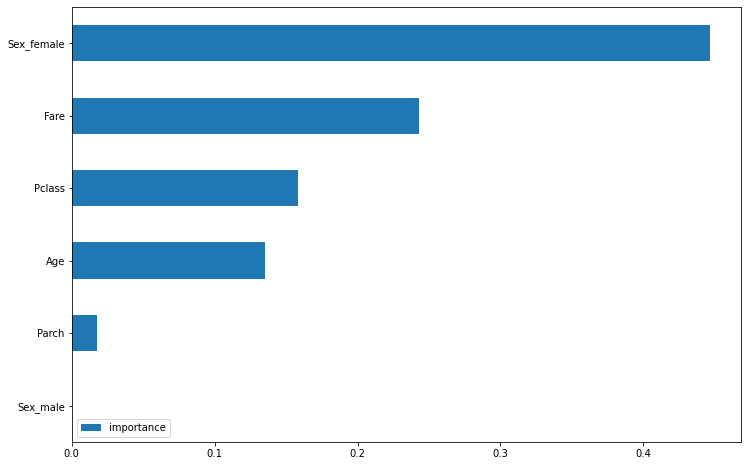

In [44]:
# Построение графика важности переменных.
feature_importances_inv.plot(kind='barh', figsize=(12, 8))
plt.show()

In [45]:
from sklearn.ensemble import BaggingClassifier

In [50]:
# Проверим на бэггинг (делаем подвыборки из основного датасета, создаем алгоритмы для каждой новой подвыборки, агрегируем результаты)

In [82]:
# Разделяем нашу выборку на обучающую и тестовую
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [83]:
clf = tree.DecisionTreeClassifier(max_depth =7, random_state = 21)

In [84]:
bagging = BaggingClassifier(base_estimator=clf,n_estimators=200)

In [85]:
bagging.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                        random_state=21),
                  n_estimators=200)

In [86]:
bagging.score (X_test,Y_test)

0.8333333333333334

Случайный лес

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
data = pd.read_csv('titanic.csv',  encoding='utf-8')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [90]:
X = data.drop(['PassengerId', 'Survived', 'Name', 'Ticket' , 'Cabin', 'Embarked', 'SibSp'], axis = 1)
Y = data.Survived
# axis = 1 значает, что удалятся столбцы, а не индексы датафрейма 
                      # Survived убрали, потому что будем ее предсказывать. ( Удаляем ненужные для предикшена столбцы)

In [91]:
X = pd.get_dummies (X) # конвертирует переменные (строчные) в числовые (0,1) автоматически

In [92]:
X = X.fillna({'Age' : X.Age.median( )}) # заменяет все пропущенные значения в возрасте на средний возраст пассажиров(медианный)

In [93]:
pd.options.mode.chained_assignment = None # отключаем розовые предупреждения)

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [107]:
model = RandomForestClassifier(n_estimators=100)

In [108]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [111]:
#Результат модели Случайного леса
model.score(X_test,Y_test)

0.8